In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
#Pull in X, Y data
x = pd.read_csv('PreprocX.csv', header=None)
#x.drop('Unnamed: 0', axis=1, inplace=True)

y = pd.read_csv('PreprocY.csv', header=None)
y.drop(0, axis=1, inplace=True)

x_mini = pd.read_csv('PreprocXmini.csv', header=None)
#x_mini.drop('Unnamed: 0', axis=1, inplace=True)

y_mini = pd.read_csv('PreprocYmini.csv', header=None)
y_mini.drop(0, axis=1, inplace=True)

In [3]:
#Check shapes
xshape = x.shape
yshape = y.shape
xmshape = x_mini.shape
ymshape = y_mini.shape
print('DF:    |  Shape:\nx      | {}\ny      | {}\nx_mini | {}\ny_mini | {}'.format(xshape,yshape,xmshape,ymshape))

DF:    |  Shape:
x      | (60448, 37)
y      | (60448, 1)
x_mini | (6045, 37)
y_mini | (6045, 1)


In [4]:
#Convert y and y_mini into integer categories
replc = ['on-time', '1-7dayL', '7-30dayL', '30-90dayL', '>90dayL']
labels = list(range(0,len(replc)))

y_mini.replace(replc, labels, inplace=True)
y.replace(replc, labels, inplace=True)

In [5]:
#Make all data into arrays
x = np.array(x)
y = np.array(y)
x_mini = np.array(x_mini)
y_mini = np.array(y_mini)

In [6]:
#Setting up the NN
from tensorflow.keras.layers import Dense, Activation, GaussianNoise

#initiate the mini model
######################################################
mini_model = keras.Sequential()

#Add layers
mini_model.add(Dense(128, input_shape=(37,), activation='relu'))

mini_model.add(Dense(256, activation='relu'))

mini_model.add(GaussianNoise(stddev=0.025))

mini_model.add(Dense(256, activation='relu'))

mini_model.add(Dense(128, activation='relu'))

mini_model.add(Dense(5, activation='softmax'))

#initiate the full model
#####################################################
full_model = keras.Sequential()

#Add layers
full_model.add(Dense(128, input_shape=(37,), activation='relu'))

full_model.add(Dense(256, activation='relu'))

full_model.add(GaussianNoise(stddev=0.025))

full_model.add(Dense(256, activation='relu'))

full_model.add(Dense(128, activation='relu'))

full_model.add(Dense(5, activation='softmax'))

In [7]:
#Create early stop callback
from tensorflow.keras.callbacks import EarlyStopping

stop_on_val_loss = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.0001, patience=5)

In [8]:
#Callback to store epoch data for graphing
from tensorflow.keras.callbacks import CSVLogger

full_file_name = 'SupplyNNf_log.csv'
mini_file_name = 'SupplyNNm_log.csv'
full_csv_logger = CSVLogger(filename=full_file_name, separator=',', append=False)
mini_csv_logger = CSVLogger(filename=mini_file_name, separator=',', append=False)

In [9]:
# #Save best model with estimator
# from tensorflow.estimator import BestExporter
# from tensorflow.estimator import compare_fn

# #folder = 'C:/Users/James Sloan/Documents/School/IE 4910 Python ML/Assignments/Project 3 Neural Networks/project 3 final'
# SaveBest = BestExporter(name='bestNN', compare_fn=val_loss_smaller)

In [10]:
#Define loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [25]:
#compile models
mini_model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

full_model.compile(optimizer='adam',
                  loss = loss_fn,
                  metrics=['accuracy'])

In [26]:
#Train the mini model
mini_model.fit(x_mini, y_mini, batch_size=128, epochs = 256,
         validation_split=0.10, callbacks=[mini_csv_logger, stop_on_val_loss])

Train on 5440 samples, validate on 605 samples
Epoch 1/256
5440/5440 [==============================] - 0s 74us/sample - loss: 1.0481 - accuracy: 0.8568 - val_loss: 1.0559 - val_accuracy: 0.8512
Epoch 2/256
5440/5440 [==============================] - 0s 23us/sample - loss: 1.0433 - accuracy: 0.8621 - val_loss: 1.0597 - val_accuracy: 0.8446
Epoch 3/256
5440/5440 [==============================] - 0s 21us/sample - loss: 1.0519 - accuracy: 0.8517 - val_loss: 1.0620 - val_accuracy: 0.8446
Epoch 4/256
5440/5440 [==============================] - 0s 21us/sample - loss: 1.0602 - accuracy: 0.8454 - val_loss: 1.0778 - val_accuracy: 0.8281
Epoch 5/256
5440/5440 [==============================] - 0s 20us/sample - loss: 1.0501 - accuracy: 0.8540 - val_loss: 1.0606 - val_accuracy: 0.8430
Epoch 6/256
5440/5440 [==============================] - 0s 23us/sample - loss: 1.0461 - accuracy: 0.8579 - val_loss: 1.0578 - val_accuracy: 0.8446


In [27]:
#train the full model
full_model.fit(x, y, batch_size=512, epochs = 256,
         validation_split=0.10, callbacks=[full_csv_logger, stop_on_val_loss])

Train on 54403 samples, validate on 6045 samples
Epoch 1/256
54403/54403 [==============================] - 1s 16us/sample - loss: 1.0891 - accuracy: 0.8137 - val_loss: 1.0705 - val_accuracy: 0.8342
Epoch 2/256
54403/54403 [==============================] - 1s 10us/sample - loss: 1.0896 - accuracy: 0.8134 - val_loss: 1.0753 - val_accuracy: 0.8258
Epoch 3/256
54403/54403 [==============================] - 1s 11us/sample - loss: 1.0882 - accuracy: 0.8144 - val_loss: 1.0692 - val_accuracy: 0.8329
Epoch 4/256
54403/54403 [==============================] - 1s 12us/sample - loss: 1.0878 - accuracy: 0.8145 - val_loss: 1.0795 - val_accuracy: 0.8245
Epoch 5/256
54403/54403 [==============================] - 1s 11us/sample - loss: 1.0884 - accuracy: 0.8143 - val_loss: 1.0970 - val_accuracy: 0.8200
Epoch 6/256
54403/54403 [==============================] - 1s 12us/sample - loss: 1.0898 - accuracy: 0.8128 - val_loss: 1.0788 - val_accuracy: 0.8208
Epoch 7/256
54403/54403 [==========================

In [14]:
def PlotTrainingData(path, file_name):
    import os
    path, file_name = path, file_name
    path = os.path.join(path,file_name)
    epoch_data = pd.read_csv(path)
    epoch_data.drop(columns=['epoch'],inplace=True)
    display(epoch_data)
    plt.figure(figsize=(10,7))
    plt.tight_layout()
    #Plot accuracy and val_accuracy
    plt.subplot(2,2,1)
    acc_data = epoch_data[['accuracy','val_accuracy']]
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Model Accuracy')
    plt.plot(acc_data)
    plt.legend(['train','test'])
    #Plot loss and val_loss
    plt.subplot(2,2,2)
    loss_data = epoch_data[['loss','val_loss']]
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Model Loss')
    plt.plot(loss_data)
    plt.legend(['train','test'])
    #Print max val_acc and min val_loss
    max_acc = epoch_data['val_accuracy'].max()
    min_loss = epoch_data['val_loss'].min()
    print('Max validation accuracy: {}\nMin validation loss: {}'.format(max_acc,min_loss))

,accuracy,loss,val_accuracy,val_loss
0,0.643199,1.270290,0.667769,1.232983
1,0.711397,1.191298,0.672727,1.231025
2,0.714154,1.188520,0.672727,1.229459
3,0.714338,1.188115,0.674380,1.229238
4,0.726103,1.178240,0.733884,1.165909
5,0.816912,1.093276,0.834711,1.077990
6,0.832904,1.073898,0.809917,1.088654
7,0.831801,1.071553,0.814876,1.088347
8,0.845221,1.060102,0.828099,1.078465
9,0.846691,1.058763,0.834711,1.074820


Max validation accuracy: 0.8561984
Min validation loss: 1.0502729039546872


,accuracy,loss,val_accuracy,val_loss
0,0.701505,1.209585,0.547560,1.350670
1,0.729243,1.173435,0.547560,1.349762
2,0.756300,1.148081,0.775848,1.113751
3,0.807400,1.096210,0.817701,1.104769
4,0.809588,1.093659,0.828122,1.074322
5,0.811573,1.091744,0.828453,1.074865
6,0.812216,1.091145,0.747064,1.126597
7,0.813668,1.089676,0.815054,1.106356
8,0.813062,1.090075,0.790902,1.109974
9,0.813613,1.089404,0.775352,1.107811


Max validation accuracy: 0.82845324
Min validation loss: 1.0743219403021589


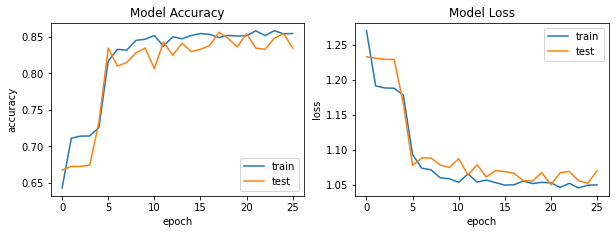

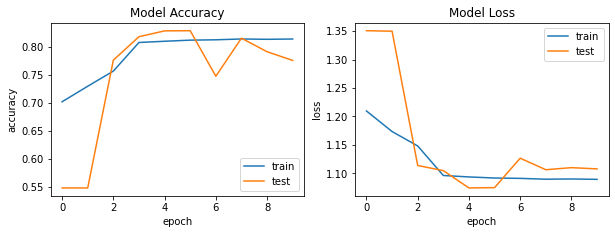

In [15]:
#Plot accuracy and loss
path = 'C:/Users/James Sloan/Documents/School/IE 4910 Python ML/Assignments/Project 4_Real World Data'

PlotTrainingData(path=path, file_name=mini_file_name)
PlotTrainingData(path=path, file_name=full_file_name)


In [16]:
#Make Predictions on full test set
full_pred = full_model.predict(x)
mini_pred = mini_model.predict(x)

In [17]:
#Function to convert probability array into 1D prediction array
def Probs2Preds(labels, prob_array):
    preds = []
    for list in prob_array:
        position = 0
        max_prob = 0
        for prob in list:
            if prob > max_prob:
                max_prob = prob
                max_label = labels[position]
            position = position + 1
        preds.append(max_label)
    preds = np.array(preds)
    return(preds)

In [18]:
full_pred_labels = Probs2Preds(labels=labels, prob_array=full_pred)
mini_pred_labels = Probs2Preds(labels=labels, prob_array=mini_pred)

In [19]:
#Make confusion matrices
#Full model
full_cmat = np.array(tf.math.confusion_matrix(labels=y, predictions=full_pred_labels))

#Mini model
mini_cmat = np.array(tf.math.confusion_matrix(labels=y, predictions=mini_pred_labels))

In [20]:
def PrettyCmatrix(cmat, labels, title='Confusion Matrix', normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    
    accuracy = np.trace(cmat)
    misclass = 1 - accuracy
    
    plt.figure(figsize=(8,6))
    cmap = plt.get_cmap('Blues')
    plt.imshow(cmat, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    if normalize:
        cmat = cmat.astype('float') / cmat.sum(axis=1)[:, np.newaxis]
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\nacc% = {} : misclass% = {}'.format(accuracy,misclass))
    plt.show()

In [21]:
#Takes any square np.array and converts it to a confusion matrix
def PlotCmatrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 5))
    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


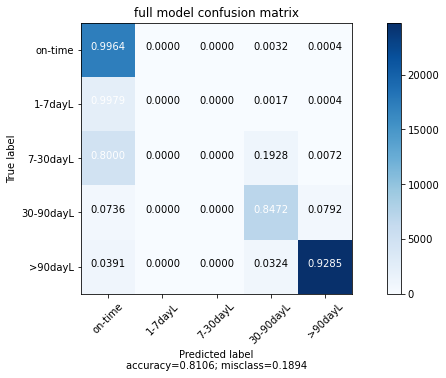

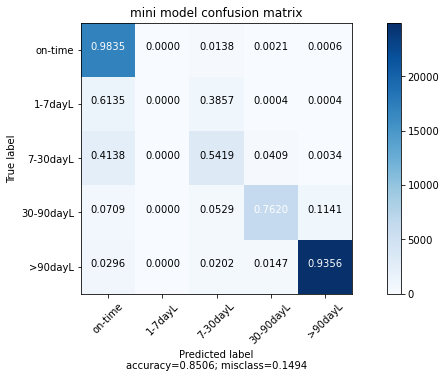

In [22]:
PlotCmatrix(cm=full_cmat, target_names=replc, title='full model confusion matrix')
PlotCmatrix(cm=mini_cmat, target_names=replc, title='mini model confusion matrix')

In [23]:
tf.__version__

'2.1.0'

In [24]:
#save models for later prediction
models = [mini_model, full_model]
names = ['NN_mini', 'NN_full']

for i in range(len(models)):
    models[i].save(names[i] + '.h5')